### Lead Scoring Case Study


In [299]:
import warnings
warnings.filterwarnings('ignore')

In [300]:
# Importing Pandas , NumPy , seaborn and matplot
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [302]:
# Dimensions of the dataframe
leads_data.shape

(9240, 37)

In [303]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Step-1: Data Cleaning
    1. Identifying the data types
	2. Fixing the rows and columns
	3. Imputing/removing missing values
	4. Handling outliers
	5. Standardising the values
	6. Fixing invalid values
    7. Filtering the data

In [304]:
# Replace select with NaN in the dataframe
leads_data.replace(to_replace="Select",value=np.nan,inplace=True)

In [305]:
# Find percentage of Missing Values in each Column and drop the columns which are having more than 40% missing values
# 1. Find Total Rows in the dataframe
# 2. Find the percentage of missing values in each column
# 3. Extract the column names which are having more than 40.0 percent missing values
# 4. drop those columns from Dataframe

def func_check_missing_value(data,missing_percent=40.0):
    total_rows = data.shape[0]
    df_missing_value_details = (data.isnull().sum()/total_rows * 100)
    filtered_columns = df_missing_value_details[df_missing_value_details >= missing_percent]
    missing_value_columns = filtered_columns.to_frame().reset_index()["index"].to_list()
    print("Columns with Missing Values > {0} :\n{1}".format(missing_percent,filtered_columns))
    return missing_value_columns


In [306]:
# Identify the column which are have more than 40% of Missing Values
columns_to_drop = func_check_missing_value(data=leads_data,missing_percent=40.0)

Columns with Missing Values > 40.0 :
How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64


In [307]:
# Drop columns with greater than 40% of Missing Values
leads_data = leads_data.drop(columns=columns_to_drop,axis=1)

In [308]:
#dropping ProspectID  as those are just unique values and it is not helpful for the model
leads_data.drop(columns=["Prospect ID"],inplace=True)

In [309]:
#Finding Unique Values & its count in categorical Variables
categorical_columns = leads_data.select_dtypes(include="object").columns

for column in categorical_columns:
    print("Unique Values in Column:{0}".format(column))
    print(leads_data[column].value_counts(normalize=True))
    print("*"*40)

Unique Values in Column:Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
****************************************
Unique Values in Column:Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
*********

In [310]:
# Identify Columns which having more than 80% values taged to 1 Category and extract the column Names
column_with_imbalance = []
for column in categorical_columns:
    if sorted(list(leads_data[column].value_counts(normalize=True).values))[-1] >= 0.80:
        column_with_imbalance.append(column)
print(column_with_imbalance)

['Do Not Email', 'Do Not Call', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [311]:
#drop Columns with 80% imbalance
leads_data.drop(columns=column_with_imbalance,inplace=True,axis=1)

In [312]:
# Checking the shape of the Dataset Number of Columns reduced to 13
leads_data.shape

(9240, 13)

In [313]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [314]:
#Convert few categorical Columns to Object type
leads_data["Converted"] = leads_data["Converted"].astype("object")
leads_data["Lead Number"] = leads_data["Lead Number"].astype("object")

In [315]:
# Function to Print % of missing values in the provided Columns
def percent_of_missing_values(data,columns=[]):
    for column in columns:
        print("Percentage of Missing Value in Column {0}:{1}".format(column,leads_data[column].isnull().sum()/leads_data.shape[0] *100))

In [316]:
numeric_columns     = leads_data.select_dtypes(exclude="object").columns
categorical_columns =  leads_data.select_dtypes(include="object").columns

In [317]:
# Plot Functions for Outlier and Univariate Analysis
def func_boxplot(data,column,xlabel="",ylabel="",ticks=[],labels=[]):
    sns.boxplot(data=data)
    plt.title("Analysis of " + column )

    if ylabel != "":
        plt.ylabel(ylabel, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    
    if xlabel != "":
        plt.ylabel(xlabel, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

    if ticks != [] and labels !=[]:
        plt.yticks(ticks, labels)
    
    plt.xticks([0],[column])

    plt.show()


In [318]:
#Check for Percentage of Missing  Values in Numeric Columns and check the quantiles for Outlier Analysis
percent_of_missing_values(leads_data,numeric_columns)
print(leads_data[numeric_columns].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,1]))

Percentage of Missing Value in Column TotalVisits:1.4826839826839828
Percentage of Missing Value in Column Total Time Spent on Website:0.0
Percentage of Missing Value in Column Page Views Per Visit:1.4826839826839828
      TotalVisits  Total Time Spent on Website  Page Views Per Visit
0.00          0.0                         0.00                   0.0
0.25          1.0                        12.00                   1.0
0.50          3.0                       248.00                   2.0
0.75          5.0                       936.00                   3.0
0.90          7.0                      1380.00                   5.0
0.95         10.0                      1562.00                   6.0
0.99         17.0                      1840.61                   9.0
1.00        251.0                      2272.00                  55.0


**Observation**:
1.  For TotalVisits difference between 99 percentile and max value is high , so we can use median instead of Mode to impute missing values
1.  For Page Views Per Visit difference between 99 percentile and max value is high , so we can use median instead of Mode to impute missing values.

*However the number of missing value is less then 2%, so dropping those rows might not impact the overall data.*

In [319]:
# Removing NaN TotalVisits  &  Page Views Per Visit rows
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]
leads_data = leads_data[~np.isnan(leads_data['Page Views Per Visit'])]

In [320]:
percent_of_missing_values(leads_data,numeric_columns)
print(leads_data[numeric_columns].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,1]))

Percentage of Missing Value in Column TotalVisits:0.0
Percentage of Missing Value in Column Total Time Spent on Website:0.0
Percentage of Missing Value in Column Page Views Per Visit:0.0
      TotalVisits  Total Time Spent on Website  Page Views Per Visit
0.00          0.0                         0.00                   0.0
0.25          1.0                         9.00                   1.0
0.50          3.0                       244.00                   2.0
0.75          5.0                       919.50                   3.0
0.90          7.0                      1372.00                   5.0
0.95         10.0                      1556.90                   6.0
0.99         17.0                      1838.96                   9.0
1.00        251.0                      2272.00                  55.0


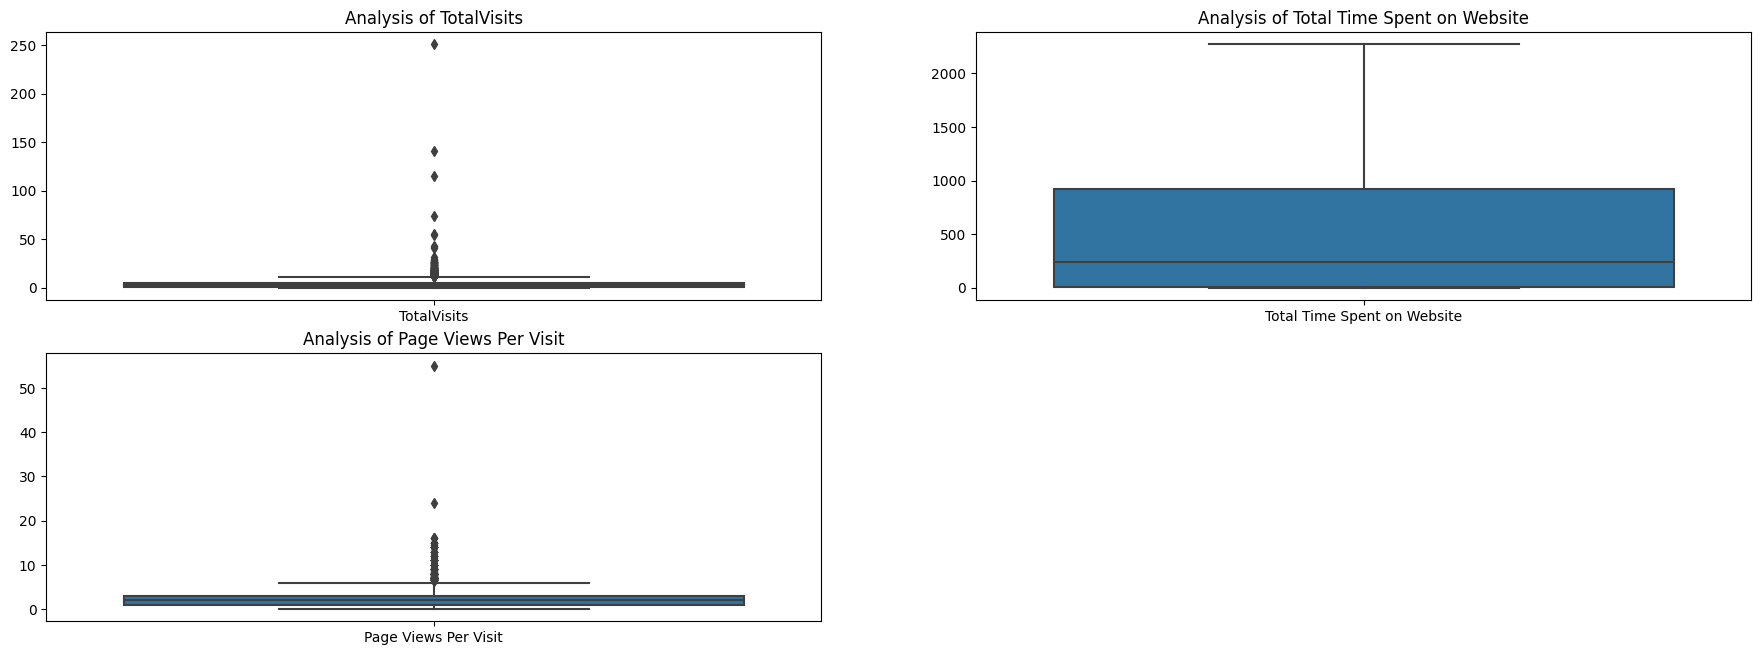

In [321]:
# Outlier Analysis - Draw box plot to see the data distribution
plt.figure(figsize=(22, 16))

def plot(x,data,column):
    plt.subplot(4,2,x)
    
    sns.boxplot(data=data)
    plt.title("Analysis of " + column )    
    plt.xticks([0],[column])


for x,column in enumerate(numeric_columns):
    plot(x+1,leads_data[column],column)

plt.show()

In [322]:
# Check the Number of rows which are having values greater than 99th Percentile value for numeric Columns
total_rows = leads_data.shape[0]
for column in numeric_columns:
    print("Number of Rows > 99 percentile for column {0}:{1}".format(column,
                                                                     len(leads_data[leads_data[column] >= leads_data[column].quantile([0.99]).values[0]])/total_rows * 100.0
                                                                     )
                                                                     )


Number of Rows > 99 percentile for column TotalVisits:1.0875535537734813
Number of Rows > 99 percentile for column Total Time Spent on Website:1.0106558277490936
Number of Rows > 99 percentile for column Page Views Per Visit:1.318246731846644


In [323]:
# limiting Numerical Columns to 99th percentile as the number of rows more than 99th Percentile is less than 2%
for column in numeric_columns:
    leads_data = leads_data[leads_data[column] < leads_data[column].quantile([0.99]).values[0]]


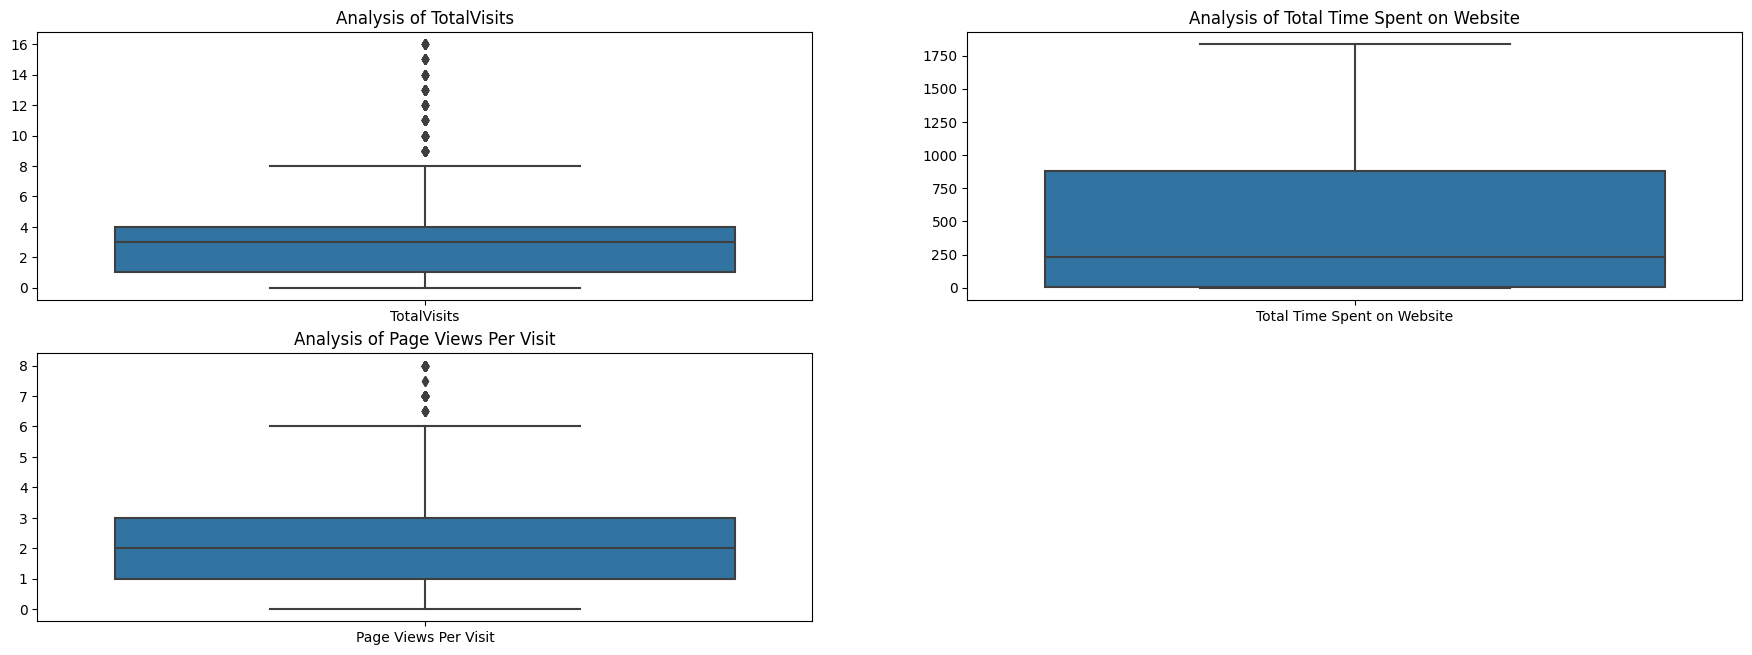

In [324]:
plt.figure(figsize=(22, 16))

def plot(x,data,column):
    plt.subplot(4,2,x)
    
    sns.boxplot(data=data)
    plt.title("Analysis of " + column )    
    plt.xticks([0],[column])


for x,column in enumerate(numeric_columns):
    plot(x+1,leads_data[column],column)

plt.show()

**Observations:**
1. Removing Outlier help us find the distribution of data more easily.

In [325]:
# Total Number of rows reduced from 9000+ to 8800 after Data Cleaning
leads_data.shape

(8802, 13)

In [326]:
percent_of_missing_values(leads_data,categorical_columns)

Percentage of Missing Value in Column Lead Number:0.0
Percentage of Missing Value in Column Lead Origin:0.0
Percentage of Missing Value in Column Lead Source:0.3294705748693479
Percentage of Missing Value in Column Converted:0.0
Percentage of Missing Value in Column Last Activity:0.0
Percentage of Missing Value in Column Specialization:37.05975914564872
Percentage of Missing Value in Column Tags:36.900704385366964
Percentage of Missing Value in Column City:40.35446489434219
Percentage of Missing Value in Column A free copy of Mastering The Interview:0.0
Percentage of Missing Value in Column Last Notable Activity:0.0


In [327]:
#Removing Tags as it is having more categorical classes and it is not adding much infomation and  City as more than 50% of records having Mumbai
leads_data = leads_data.drop(columns=["Tags","City"],axis=1)

In [328]:
# Removing Missing Value Rows for Lead Source as it is less 0.4% and also Removing Missing Value Rows for Last Activity as it is less than 1.5%
leads_data = leads_data[pd.notna(leads_data['Lead Source'])]
leads_data = leads_data[pd.notna(leads_data['Last Activity'])]


In [329]:
#Replace yes and no with 1 and 0 for "A free copy of Mastering The Interview" column

# Defining the map function
def binary_map(x):
    if x == 'Yes':
        return 1
    else:
        return 0

# Applying the function to the housing list
leads_data["A free copy of Mastering The Interview"] = leads_data["A free copy of Mastering The Interview"].apply(binary_map)

In [330]:
# Functions to CountPlot for performing Univariate Analysis
def annotate_barplot(plots,text_size=10):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                           (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                           size=text_size, xytext=(0, 8),
                           textcoords='offset points')
def uv_countplot(data_1,data_0,column,ylabel1="",xlabel1="",ylabel0="",xlabel0=""):

    plt.figure(figsize = [20,8])

    plt.subplot(1,2,1)
    pltname = column + ' of Converted Leads'
    plt.title(pltname)
    plot = sns.countplot(x = column, data = data_1, order = sorted(data_1[column].unique(), reverse = True))
    annotate_barplot(plot)
    if ylabel1 != "":
        plt.ylabel(ylabel1, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    
    if xlabel1 != "":
        plt.ylabel(xlabel1, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    pltname = column + ' of Non-Converted Leads'
    plt.title(pltname)
    plot = sns.countplot(x = column, data = data_0, order = sorted(data_0[column].unique(), reverse = True))
    annotate_barplot(plot)
    if ylabel0 != "":
        plt.ylabel(ylabel0, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    
    if xlabel0 != "":
        plt.ylabel(xlabel0, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    
    plt.xticks(rotation=90)
    plt.show()

def uv_barplot(data_1,data_0,column,ylabel1="",xlabel1="",ylabel0="",xlabel0="",hbar=False,rotation=90,annotateSize=10):
    plt.figure(figsize = [20,8])

    plt.subplot(1,2,1)
    
    plot = (data_1[column].value_counts(normalize=True)*100).plot.bar(title = column + " - Converted")
    annotate_barplot(plot,text_size=annotateSize)
    plt.xticks(rotation=rotation)

    plt.subplot(1,2,2)
   
    plot = (data_0[column].value_counts(normalize=True)*100).plot.bar(title = column + " - Non-Converted") 
    annotate_barplot(plot,text_size=annotateSize)
    plt.xticks(rotation=rotation)

    plt.show()

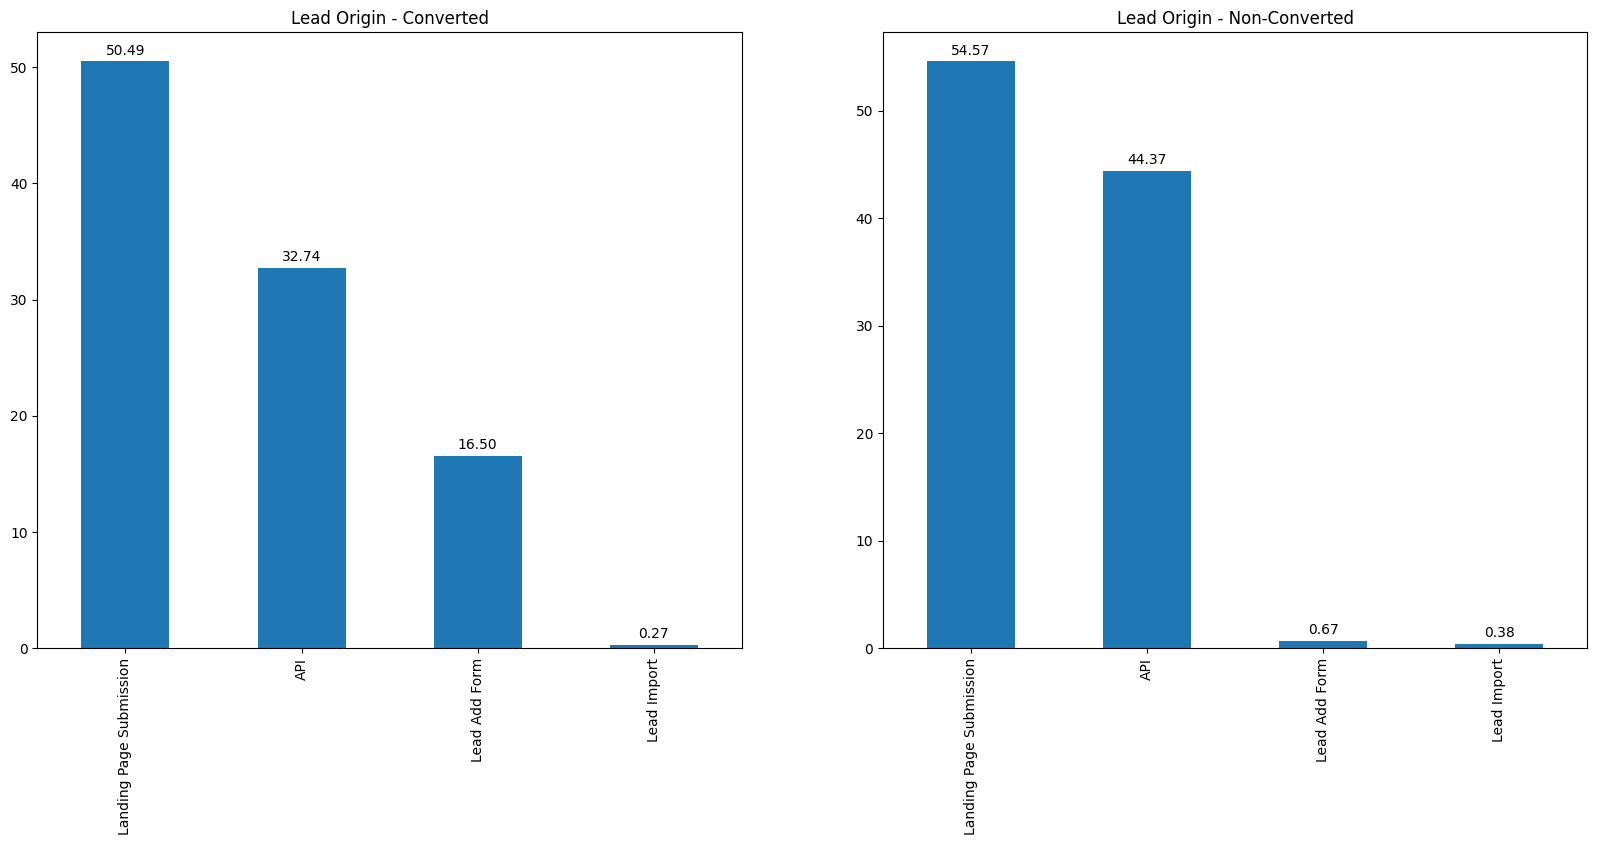

In [331]:
# Visualize Lead Origin to see data Distribution
uv_barplot(data_0=leads_data[leads_data["Converted"]==0],data_1=leads_data[leads_data["Converted"]==1],column="Lead Origin")

**Observation:**
Both in Converted and Non-Converted Category there is not much of the Difference except for the Lead Add Form which seem to be contribution more to the Conversion Rate

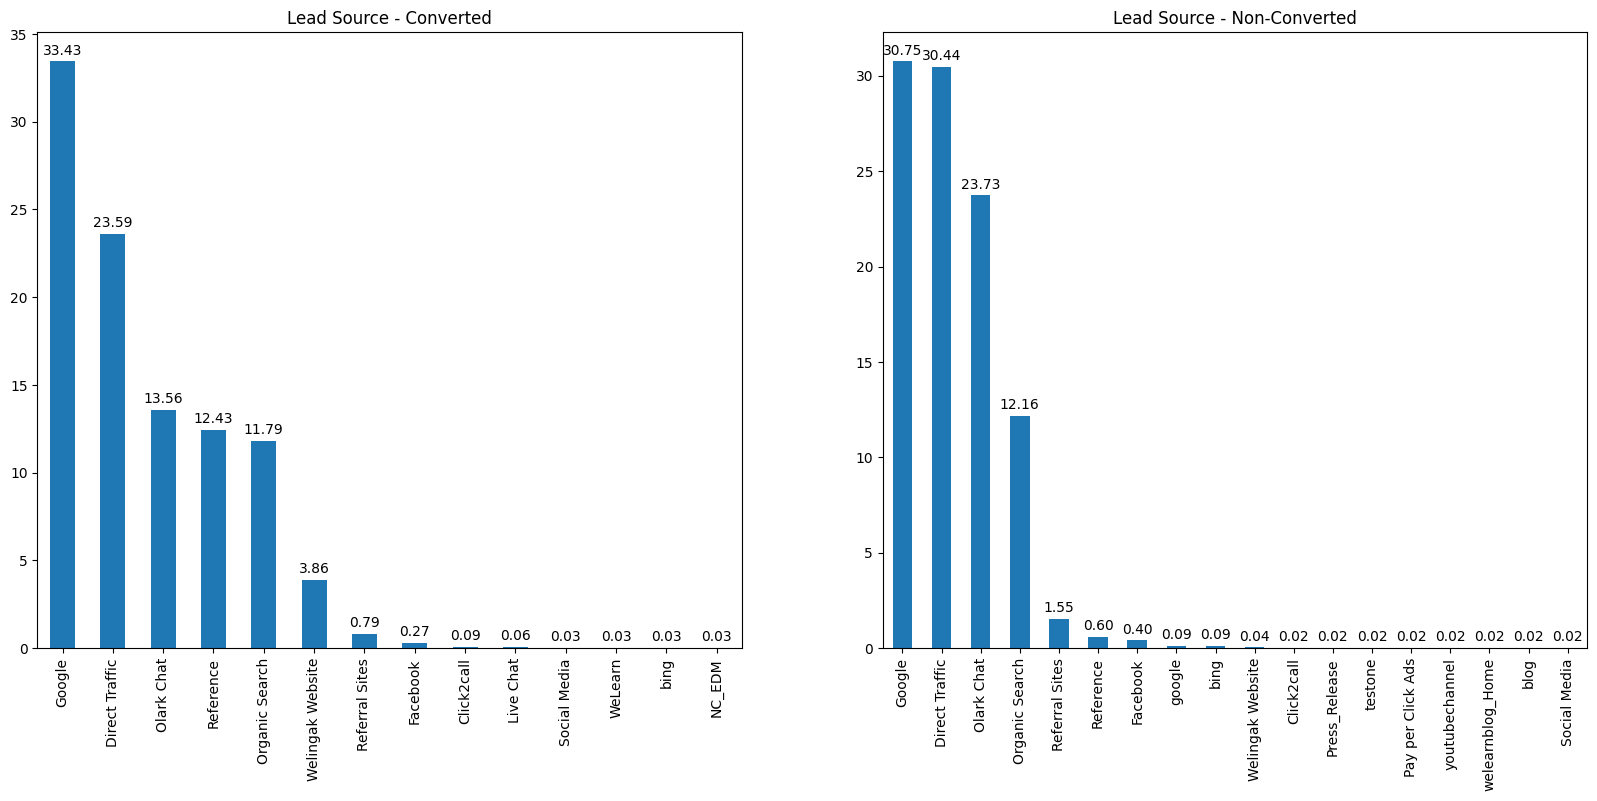

In [332]:
# Visualize Lead Source to see data Distribution
uv_barplot(data_0=leads_data[leads_data["Converted"]==0],data_1=leads_data[leads_data["Converted"]==1],column="Lead Source")

**Observation:**
Direct Traffic and Olark Chat seems to be less effective in conversion Rate

In [333]:
# Change Null Values to Other to Treat Missing Values instead of using Median
leads_data["Specialization"] = leads_data["Specialization"].fillna("Other")

In [334]:
#Treating Specilization
#Convert Multiple Forms of Management into 1 
def convert_management_to_one(c_value):
    if "Management" in c_value:
        return "Management"
    else:
        return c_value

leads_data["Specialization"] = leads_data["Specialization"].apply(convert_management_to_one)

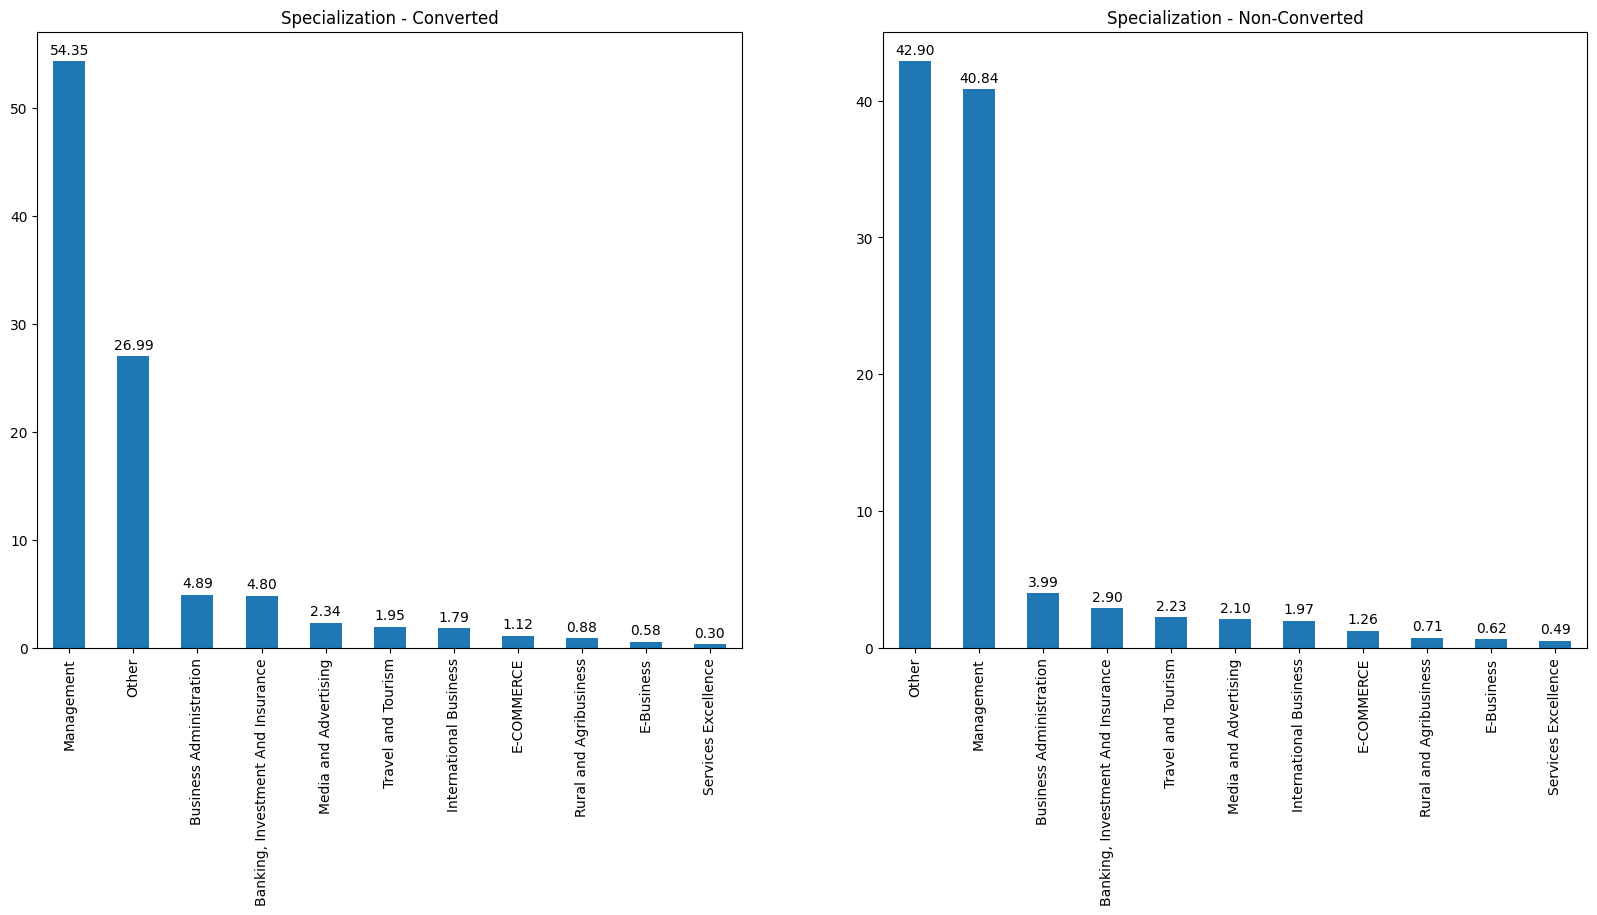

In [335]:
# Visualize Lead Source to see data Specialization
uv_barplot(data_0=leads_data[leads_data["Converted"]==0],data_1=leads_data[leads_data["Converted"]==1],column="Specialization")


**Observation:**
Management Course is very popular and contributes to 40% of leads . There is more conversion for Management Course compared to others

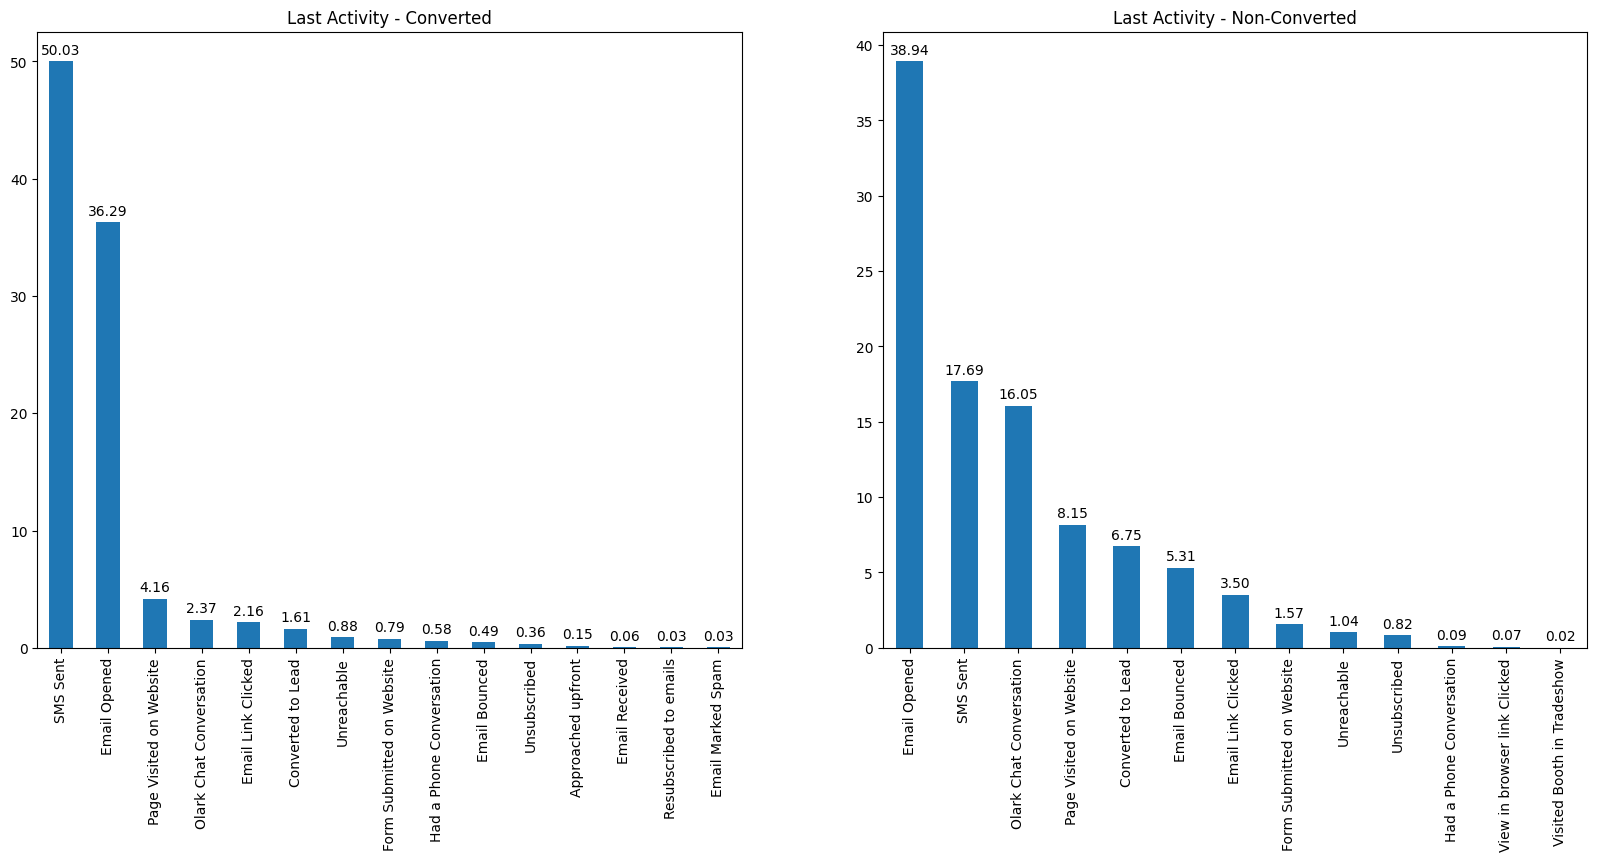

In [336]:
uv_barplot(data_0=leads_data[leads_data["Converted"]==0],data_1=leads_data[leads_data["Converted"]==1],column="Last Activity")

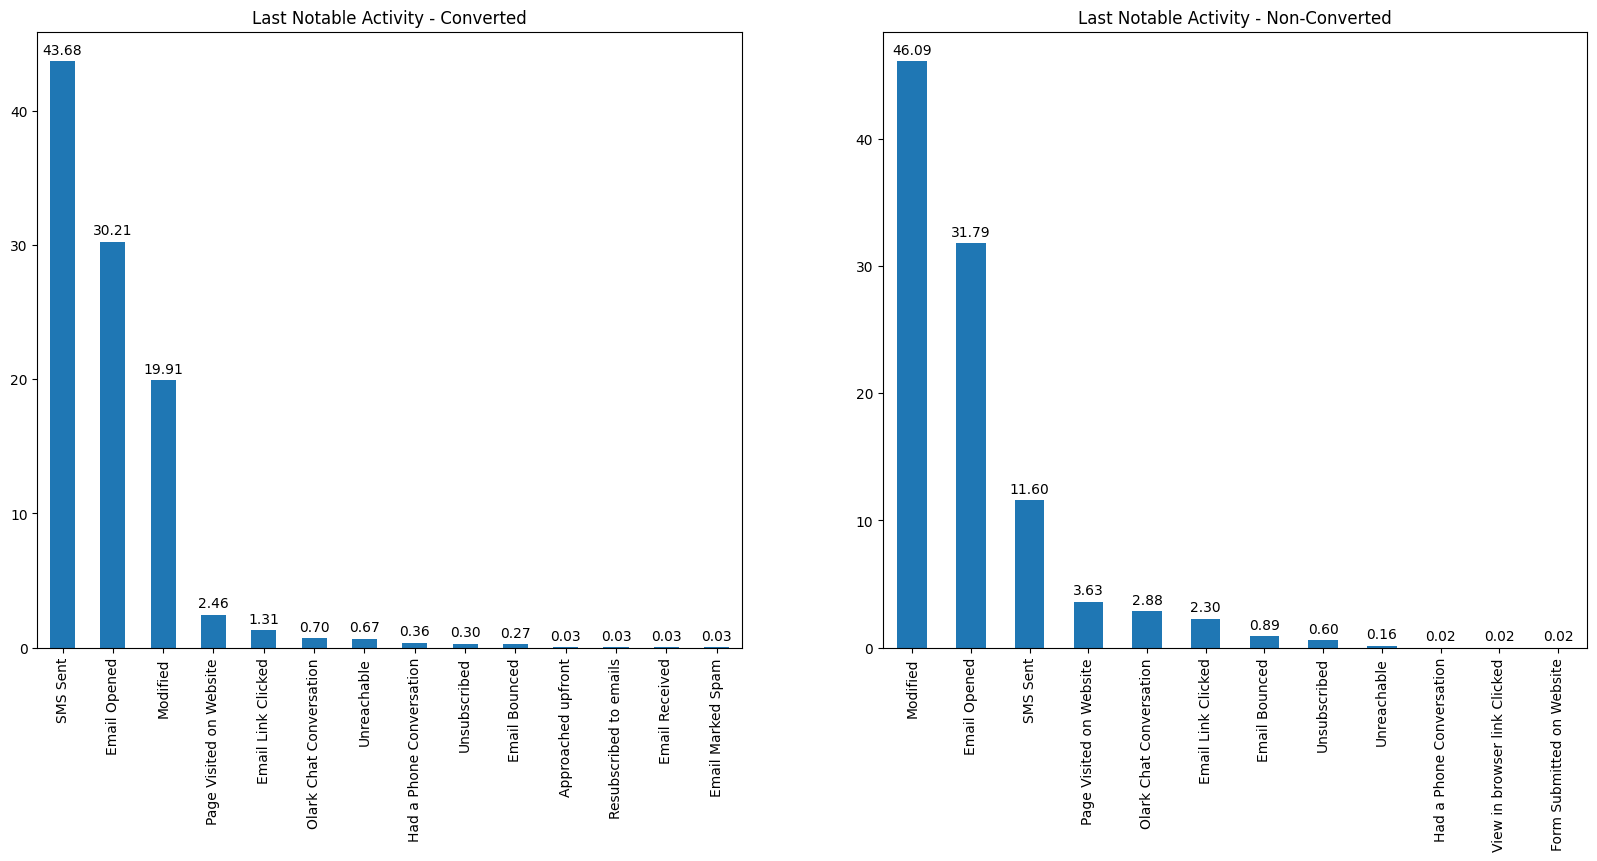

In [337]:
uv_barplot(data_0=leads_data[leads_data["Converted"]==0],data_1=leads_data[leads_data["Converted"]==1],column="Last Notable Activity")

In [338]:
#Rename the columns for easy understanding
source_columns = leads_data.columns 
leads_data.columns = ['Lead Number','Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'FreeCopyofInterview',
       'Last Notable Activity']

In [339]:
numeric_columns     = leads_data.select_dtypes(exclude="object").columns
categorical_columns = leads_data.select_dtypes(include="object").columns

# Data Preparations
1. Creating Dummies for categorical Variables
2. Perform Test-Train Split
3. Perform Scaling

#### Creating Dummies for Categorical Variables

In [340]:
categorical_columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'Last Activity', 'Specialization', 'Last Notable Activity'],
      dtype='object')

In [341]:
# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads_data['Lead Origin'], prefix='LeadOrigin')
# Dropping LeadOrigin_API Column
ml1 = ml.drop(['LeadOrigin_API'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ml = pd.get_dummies(leads_data['Lead Source'], prefix='LeadSource')
# Dropping LeadSource_Click2call Column
ml1 = ml.drop(['LeadSource_Click2call'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads_data['Last Activity'], prefix='LastActivity')
# Dropping LastActivity_Approached upfront Column
ml1 = ml.drop(['LastActivity_Approached upfront'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)


# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads_data['Specialization'], prefix='Specialization',)
# Dropping Specialization_Banking, Investment And Insurance Column
ml1 = ml.drop(['Specialization_Banking, Investment And Insurance'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
ml = pd.get_dummies(leads_data['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping LastNotableActivity_Approached upfront Column
ml1 = ml.drop(['LastNotableActivity_Approached upfront'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)

In [342]:
#Drop Source Columns of dummy variables
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'Last Notable Activity'],axis=1)

In [343]:
leads_data.shape

(8773, 70)

In [344]:
# Change Converted COlumn into Int
leads_data["Converted"]= leads_data["Converted"].astype("int")

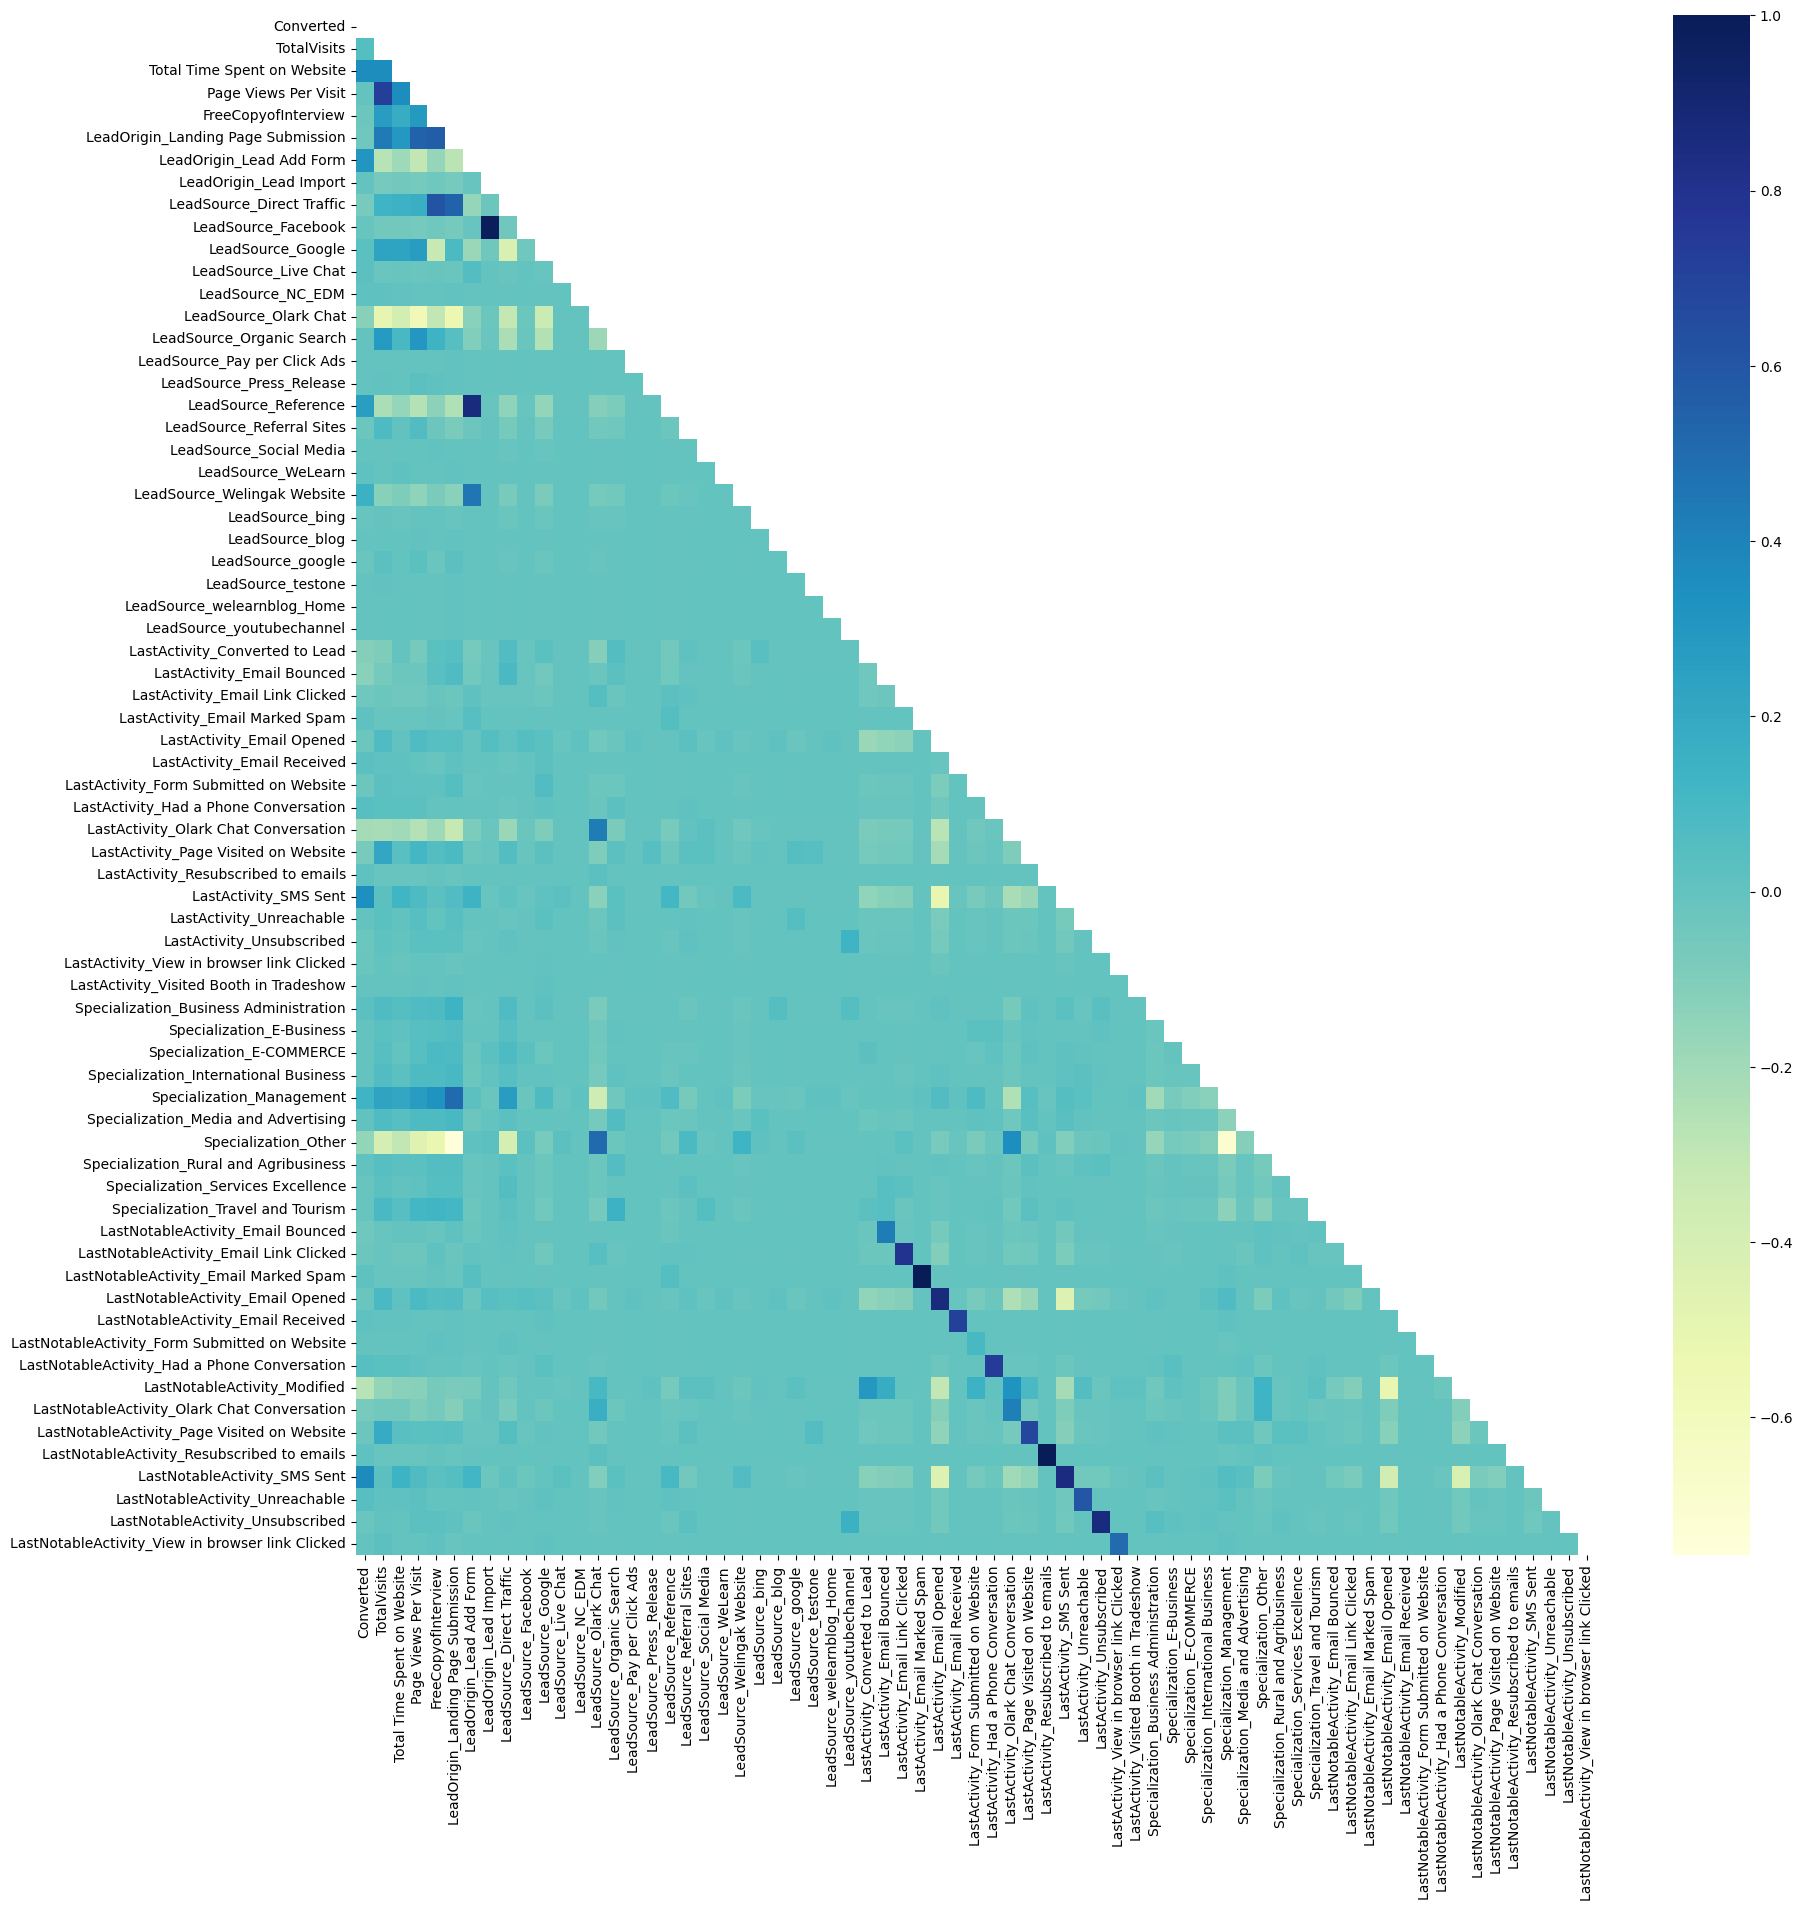

In [345]:
# Let's see the correlation matrix 

# creating mask
mask = np.triu(np.ones_like(leads_data.corr()))


plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(leads_data.corr(),cmap="YlGnBu",mask=mask)
plt.show()

In [346]:
# Identify Highly correleated Columns in the dataset
cor_matrix = leads_data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['LeadSource_Facebook', 'LastNotableActivity_Email Marked Spam', 'LastNotableActivity_Resubscribed to emails']


In [347]:
#Dropping Columns of high correlation
leads_data = leads_data.drop(columns=to_drop, axis=1)

#### Train-Test Split

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,FreeCopyofInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [350]:
# Putting response variable to y
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [351]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [352]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [353]:
# Scaling the Numerical Features with MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,FreeCopyofInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5597,0.1250,0.585286,0.250,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5046,0.0000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8965,0.1250,0.102997,0.125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5329,0.4375,0.384196,0.875,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1955,0.0625,0.523706,0.125,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Model Building

In [354]:
import statsmodels.api as sm

In [355]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6081
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.7
Date:                Tue, 21 Mar 2023   Deviance:                       5199.4
Time:                        22:52:37   Pearson chi2:                 6.13e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Feature Selection Using RFE

In [356]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [357]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [358]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_SMS Sent', 'Specialization_Other',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [359]:
labels = rfe.classes_
labels

array([0, 1])

##### Assessing the model with StatsModels

In [360]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.5
Date:                Tue, 21 Mar 2023   Deviance:                       5331.0
Time:                        22:52:42   Pearson chi2:                 6.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3639
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [361]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5597    0.576030
5046    0.194380
8965    0.280978
5329    0.676451
1955    0.190073
7527    0.059608
7024    0.194380
7282    0.141299
3907    0.350687
807     0.952885
dtype: float64

In [362]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.57602998, 0.19438009, 0.28097837, 0.6764511 , 0.19007265,
       0.05960796, 0.19438009, 0.1412991 , 0.35068679, 0.95288525])

##### Creating a dataframe with the actual CONVERTED flag and the predicted probabilities

In [363]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,1,0.576030,5597
1,0,0.194380,5046
2,0,0.280978,8965
3,0,0.676451,5329
4,1,0.190073,1955


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [364]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,1,0.576030,5597,1
1,0,0.194380,5046,0
2,0,0.280978,8965,0
3,0,0.676451,5329,1
4,1,0.190073,1955,0


In [365]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [366]:
# Confusion matrix for the train and Prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3377  477]
 [ 738 1549]]


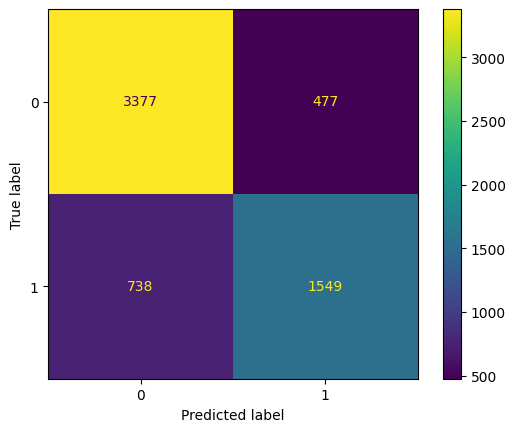

In [367]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=labels)
disp.plot()
plt.show()

In [368]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8021494870542257


In [369]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [370]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF_Checker():
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [371]:
VIF_Checker()

                                       Features   VIF
2            LeadOrigin_Landing Page Submission  5.93
4                     LeadSource_Direct Traffic  4.70
5                             LeadSource_Google  4.13
0                                   TotalVisits  3.83
6                     LeadSource_Organic Search  2.42
1                   Total Time Spent on Website  2.32
11                         Specialization_Other  1.99
12                 LastNotableActivity_Modified  1.65
10                        LastActivity_SMS Sent  1.53
3                      LeadOrigin_Lead Add Form  1.39
8                   LeadSource_Welingak Website  1.32
7                     LeadSource_Referral Sites  1.12
13  LastNotableActivity_Olark Chat Conversation  1.06
9         LastActivity_Had a Phone Conversation  1.01
14              LastNotableActivity_Unreachable  1.01


In [372]:
def check_metrics(actual,predicted):
    # confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    confusion = metrics.confusion_matrix(actual,predicted)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    sensitivity = TP / float(TP+FN)  #Recall
    specificty  = TN / float(TN+FP)
    FalsePositiveRate = FP/ float(TN+FP)
    PositivePredictiveValue = (TP / float(TP+FP))  #Precision
    NegativePredictiveValue = (TN / float(TN+ FN))

    print('Accuracy                : {0}'.format(metrics.accuracy_score(actual,predicted)))
    print("Sensitivity             : {0}".format(sensitivity))
    print("Specificty              : {0}".format(specificty))
    print("FalsePositiveRate       : {0}".format(FalsePositiveRate))
    print("PositivePredictiveValue : {0}".format(PositivePredictiveValue))
    print("NegativePredictiveValue : {0}".format(NegativePredictiveValue))
    print("F1 Score                : {0}".format(metrics.f1_score(actual,predicted)))

In [373]:
check_metrics(y_train_pred_final.Converted,y_train_pred_final.predicted)

Accuracy                : 0.8021494870542257
Sensitivity             : 0.6773065150852645
Specificty              : 0.8762324857291126
FalsePositiveRate       : 0.12376751427088739
PositivePredictiveValue : 0.7645607107601184
NegativePredictiveValue : 0.8206561360874848
F1 Score                : 0.7182935311847901


### Plotting the ROC Curve

In [374]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

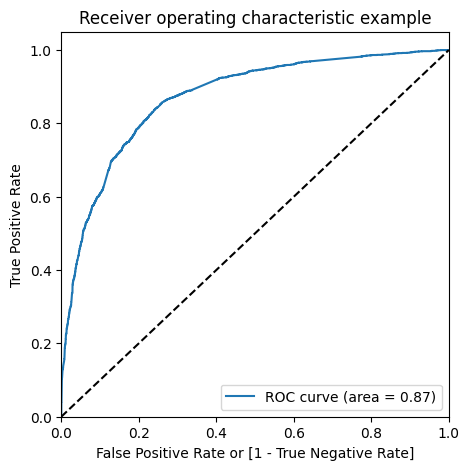

In [375]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [376]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.576030,5597,1,1,1,1,1,1,1,0,0,0,0
1,0,0.194380,5046,0,1,1,0,0,0,0,0,0,0,0
2,0,0.280978,8965,0,1,1,1,0,0,0,0,0,0,0
3,0,0.676451,5329,1,1,1,1,1,1,1,1,0,0,0
4,1,0.190073,1955,0,1,1,0,0,0,0,0,0,0,0


In [377]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.372415  1.000000  0.000000
0.1   0.1  0.607556  0.962396  0.396990
0.2   0.2  0.751995  0.888937  0.670732
0.3   0.3  0.788634  0.837341  0.759730
0.4   0.4  0.797264  0.756887  0.821225
0.5   0.5  0.802149  0.677307  0.876232
0.6   0.6  0.788308  0.560560  0.923456
0.7   0.7  0.771536  0.471797  0.949403
0.8   0.8  0.747110  0.373852  0.968604
0.9   0.9  0.701840  0.219502  0.988064


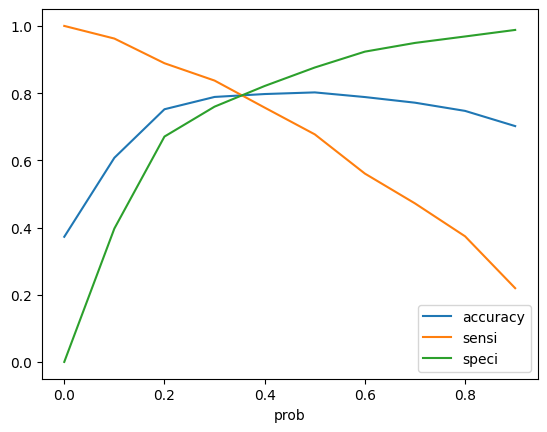

In [378]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [379]:
y_train_pred_final[0.35]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [380]:
y_train_pred_final

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.35
0,1,0.576030,5597,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.194380,5046,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.280978,8965,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.676451,5329,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.190073,1955,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,0,0.088794,386,0,1,0,0,0,0,0,0,0,0,0,0
6137,0,0.046782,85,0,1,0,0,0,0,0,0,0,0,0,0
6138,0,0.366082,8474,0,1,1,1,1,0,0,0,0,0,0,1
6139,1,0.372607,7298,0,1,1,1,1,0,0,0,0,0,0,1


In [381]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.372415  1.000000  0.000000
0.10  0.10  0.607556  0.962396  0.396990
0.20  0.20  0.751995  0.888937  0.670732
0.30  0.30  0.788634  0.837341  0.759730
0.35  0.35  0.794333  0.796240  0.793202
0.40  0.40  0.797264  0.756887  0.821225
0.50  0.50  0.802149  0.677307  0.876232
0.60  0.60  0.788308  0.560560  0.923456
0.70  0.70  0.771536  0.471797  0.949403
0.80  0.80  0.747110  0.373852  0.968604
0.90  0.90  0.701840  0.219502  0.988064


In [382]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.35,final_predicted
0,1,0.576030,5597,1,1,1,1,1,1,1,0,0,0,0,1,1
1,0,0.194380,5046,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.280978,8965,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.676451,5329,1,1,1,1,1,1,1,1,0,0,0,1,1
4,1,0.190073,1955,0,1,1,0,0,0,0,0,0,0,0,0,0


In [383]:
# Confusion matrix for the train and Prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[3057  797]
 [ 466 1821]]


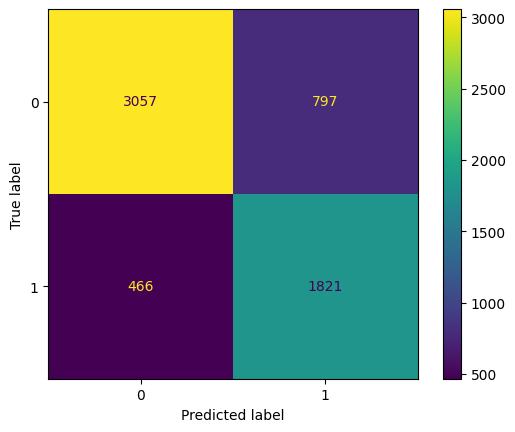

In [384]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=labels)
disp.plot()
plt.show()

In [385]:
check_metrics(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Accuracy                : 0.794333170493405
Sensitivity             : 0.7962396152164407
Specificty              : 0.7932018681888947
FalsePositiveRate       : 0.20679813181110535
PositivePredictiveValue : 0.6955691367456074
NegativePredictiveValue : 0.867726369571388
F1 Score                : 0.742507645259939


In [386]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7962396152164407

In [387]:
y_train_pred_final_score =  y_train_pred_final[["LeadID","Converted","final_predicted", "Converted_Prob"]]

In [388]:
y_train_pred_final_score["Lead Score"] =  (y_train_pred_final_score["Converted_Prob"] * 100).astype(int)

In [389]:
y_train_pred_final_score.head()

,LeadID,Converted,final_predicted,Converted_Prob,Lead Score
0,5597,1,1,0.576030,57
1,5046,0,0,0.194380,19
2,8965,0,0,0.280978,28
3,5329,0,1,0.676451,67
4,1955,1,0,0.190073,19


### Making predictions on the test set

In [390]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [391]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Referral Sites,LeadSource_Welingak Website,LastActivity_Had a Phone Conversation,LastActivity_SMS Sent,Specialization_Other,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable
4606,0.1250,0.602725,0,0,0,0,1,0,0,0,1,1,0,0,0
911,0.4375,0.560218,0,0,1,0,0,0,0,0,0,1,1,0,0
6599,0.6250,0.003815,1,0,0,0,1,0,0,0,0,0,0,0,0
8298,0.0625,0.301907,1,0,1,0,0,0,0,0,0,0,1,0,0
4313,0.1250,0.784741,0,0,0,1,0,0,0,0,1,1,0,0,0


In [392]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [393]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [394]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4606,0.728063
1,0,911,0.201373
2,0,6599,0.114363
3,0,8298,0.092022
4,0,4313,0.876311


In [395]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Converted_Prob
0,4606,1,0.728063
1,911,0,0.201373
2,6599,0,0.114363
3,8298,0,0.092022
4,4313,0,0.876311


In [396]:
#Using threshold as 0.35 as identified in Training
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,4606,1,0.728063,1
1,911,0,0.201373,0
2,6599,0,0.114363,0
3,8298,0,0.092022,0
4,4313,0,0.876311,1


In [397]:
check_metrics(actual=y_pred_final.Converted,predicted=y_pred_final.final_predicted)

Accuracy                : 0.7978723404255319
Sensitivity             : 0.7786640079760718
Specificty              : 0.8096992019643954
FalsePositiveRate       : 0.19030079803560468
PositivePredictiveValue : 0.7158570119156737
NegativePredictiveValue : 0.8559377027903958
F1 Score                : 0.7459407831900668


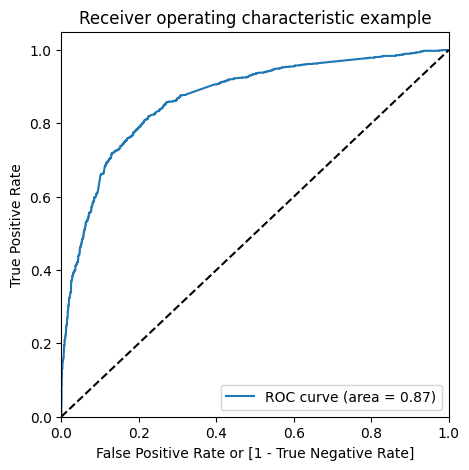

In [398]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

In [399]:
y_test_pred_final_score =  y_pred_final[["LeadID","Converted","final_predicted", "Converted_Prob"]]
y_test_pred_final_score["Lead Score"] =  (y_train_pred_final_score["Converted_Prob"] * 100).astype(int)
y_test_pred_final_score.head()

,LeadID,Converted,final_predicted,Converted_Prob,Lead Score
0,4606,1,1,0.728063,57
1,911,0,0,0.201373,19
2,6599,0,0,0.114363,28
3,8298,0,0,0.092022,67
4,4313,0,1,0.876311,19


In [400]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.5
Date:                Tue, 21 Mar 2023   Deviance:                       5331.0
Time:                        22:52:44   Pearson chi2:                 6.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3639
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.0096      0.131     -0.073      0.941      -0.267       0.248
TotalVisits                                     0.7382      0.253      2.922      0.003       0.243       1.233
Total Time Spent on Website                     3.7857      0.138     27.338      0.000       3.514       4.057
LeadOrigin_Landing Page Submission             -1.0689      0.130     -8.236      0.000      -1.323      -0.815
LeadOrigin_Lead Add Form                        2.5014      0.234     10.697      0.000       2.043       2.960
LeadSource_Direct Traffic                      -1.4381      0.150     -9.569      0.000      -1.733      -1.144
LeadSource_Google                              -1.1601      0.133     -8.691      0.000      -1.422      -0.898
LeadSource_Organic Search                      -1.4441      0.162     -8.895      0.000      -1.762      -1.126
LeadSource_Referral Sites                      -1.4605      0.370     -3.950      0.000      -2.185      -0.736
LeadSource_Welingak Website                     2.7793      1.037      2.681      0.007       0.748       4.811
LastActivity_Had a Phone Conversation           2.6726      0.629      4.250      0.000       1.440       3.905
LastActivity_SMS Sent                           1.4768      0.074     19.881      0.000       1.331       1.622
Specialization_Other                           -1.4122      0.122    -11.577      0.000      -1.651      -1.173
LastNotableActivity_Modified                   -0.9616      0.078    -12.323      0.000      -1.115      -0.809
LastNotableActivity_Olark Chat Conversation    -1.3367      0.347     -3.854      0.000      -2.017      -0.657
LastNotableActivity_Unreachable                 1.6214      0.513      3.163      0.002       0.617       2.626
===============================================================================================================
"""

In [401]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_SMS Sent', 'Specialization_Other',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

**Conclusion:**
1. We got 15 features towards end of the training, Out of which 
    * Top 3 features which has a *postive effect* on the outcome is 
        * Total Time Spent on Website - coefficient 3.7857
        * LeadSource_Welingak Website - coefficient 2.7793
        * LastActivity_Had a Phone Conversation - coefficient 2.6726
    * Top 3 features which has a *negative effect* on the outcome is 
        * LeadSource_Referral Sites  - coefficient  -1.4605
        * LeadSource_Organic Search - coefficient -1.4441
        * LeadSource_Direct Traffic  - coefficient -1.4381
<br/>
<br/>

2. using the ROC curve we evaluated the model performance  and through brute force calcuation of accuracy,sensitivit and specificity we have identified the threshold to be **0.35** for categorizing the leads as converted and not-converted
<br/>
<br/> 

2. Metrics from the Train set are as below
    *  Accuracy                : 0.794333170493405
    *  Sensitivity             : 0.7962396152164407
    *  Specificty              : 0.7932018681888947
    *  FalsePositiveRate       : 0.20679813181110535
    *  PositivePredictiveValue : 0.6955691367456074
    *  NegativePredictiveValue : 0.867726369571388
    *  F1 Score                : 0.742507645259939

<br/>
<br/>

3. Metric from the Test set are as below

    * Accuracy                : 0.7978723404255319
    * Sensitivity             : 0.7786640079760718
    * Specificty              : 0.8096992019643954
    * FalsePositiveRate       : 0.19030079803560468
    * PositivePredictiveValue : 0.7158570119156737
    * NegativePredictiveValue : 0.8559377027903958
    * F1 Score                : 0.7459407831900668

<br/>
<br/>

4. From the model we can see that having phone conversation AND direct lead add form has a positive effect on the conversion .